# How to Select a Univariate Distribution

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/StatMixedML/XGBoostLSS/blob/master/docs/examples/How_To_Select_A_Univariate_Distribution.ipynb)

In this example we will show how to select a distribution for a univariate target variable. We use the California housing dataset and select a distribution for the target variable `median_house_value`.

# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:


# Only run if not already on PYTHONPATH / venv
import os
import sys
import pathlib
from os.path import dirname
parent_path = dirname(os.path.join(pathlib.Path(pathlib.Path(os.getcwd())), "..", "..", ".."))
print(parent_path)
if parent_path not in sys.path:
    sys.path.insert(0, parent_path)



/home/georg/Projects/XGBoostLSS/docs/examples/../..


In [3]:
import xgboostlss
import xgboostlss.distributions as xgbd
import xgboostlss.distributions.distribution_utils as du
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns

# Data

In [4]:
housing_data = datasets.fetch_california_housing()
X, y = housing_data["data"], housing_data["target"]
feature_names = housing_data["feature_names"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

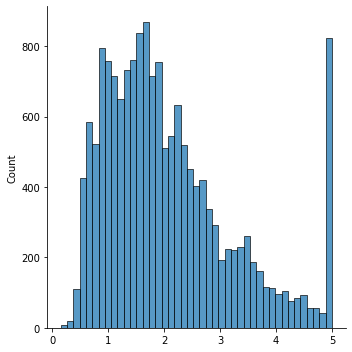

In [5]:
sns.displot(y_train)

(16512,)
(15746,)


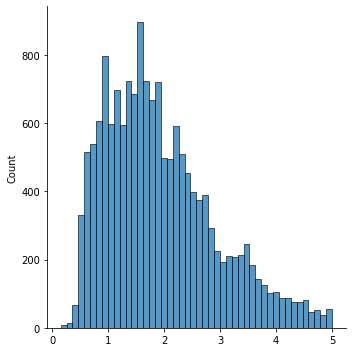

In [6]:
# Remove right-censored observations
print(y_train.shape)
y_train = y_train[y_train < y_train.max()]
print(y_train.shape)
sns.displot(y_train)

# Select Distribution

In the following, we specify a list of candidate distributions. The function `dist_select` returns the negative log-likelihood of each distribution for the target variable. The distribution with the lowest negative log-likelihood is selected. The function also plots the density of the target variable and the fitted density, using the best suitable distribution among the specified ones.

It is important to note that the list of candidate distributions should be chosen to be suitable for the target variable at hand. For example, if the target variable is a count variable, then the list of candidate distributions should include the Poisson and Negative Binomial. Similarly, if the target variable is on the positive real scale, then the list of continuous candidate distributions should be chosen accordingly.

In [36]:
candidate_distributions = [
                         xgbd.Gaussian.Gaussian(), xgbd.StudentT.StudentT(), 
                          xgbd.Gamma.Gamma(), xgbd.Cauchy.Cauchy(), xgbd.LogNormal.LogNormal(), 
        xgbd.Weibull.Weibull(), xgbd.Gumbel.Gumbel(), 
    xgbd.Laplace.Laplace(),
    xgbd.LambertWGaussian.TailLambertWGaussian(),
    xgbd.LambertWGamma.TailLambertWGamma(),
    xgbd.LambertWWeibull.TailLambertWWeibull(),
    xgbd.LambertWExponential.TailLambertWExponential(),
    xgbd.LambertWLogNormal.TailLambertWLogNormal(),
xgbd.LambertWGamma.SkewLambertWGamma(),
xgbd.LambertWLogNormal.SkewLambertWLogNormal()]
    

Fitting of candidate distributions completed: 100%|██████████| 3/3 [00:23<00:00,  8.00s/it]


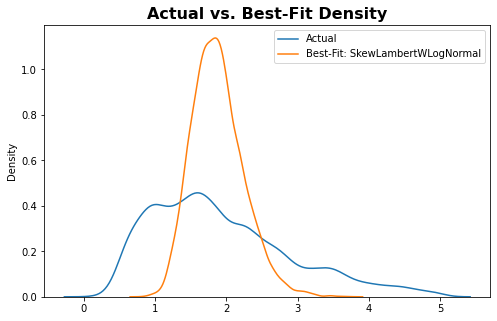

,index,loss_test,loss,distribution,params,rank
0,0,-354661.075478,-920448.992895,SkewLambertWLogNormal,"[-44.511246, -5.48339, -1.5753754]",1
1,0,-43808.720227,-148521.129204,SkewLambertWGamma,"[-3.3994913, 65.51499, 64.33237]",2
2,0,5938.119532,20954.035348,TailLambertWLogNormal,"[0.47323748, -0.4102213, -3.9142632]",3


In [38]:
#xgblss_dist_class = DistributionClass()

#candidate_distributions = [
#    xgbd.Gaussian.Gaussian(),
#    xgbd.LambertWGamma.TailLambertWGamma(),
#    xgbd.LambertWLogNormal.TailLambertWLogNormal()
#]

dist_nll = du.dist_select(target=y_train, candidate_distributions=candidate_distributions[-3:], 
                          target_test=y_test,
                                         max_iter=10, plot=True, figure_size=(8, 5))
dist_nll

In [43]:
candidate_distributions[-3:][1]

In [20]:
dist_nll

,loss_test,loss,distribution
0,5892.042503,20698.868121,TailLambertWLogNormal
0,6609.438136,22010.791952,Gaussian


<Axes: xlabel='distribution'>

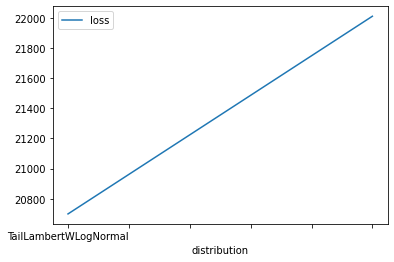

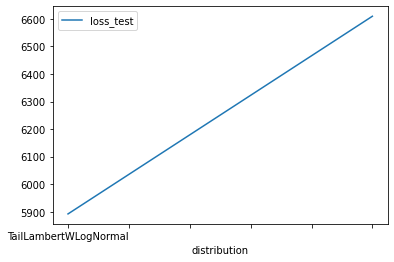

In [23]:
dist_nll.sort_values("loss", ascending=True).plot.line(x="distribution", y="loss")
dist_nll.sort_values("loss", ascending=True).plot.line(x="distribution", y="loss_test")